# Classification Binaire
## Régression logistique

In [8]:
import pandas as pd                 # Manipulation et analyse de données, structure DataFrame
import numpy as np                  # Calcul scientifique et opérations matricielles rapides
import matplotlib.pyplot as plt     # Création de graphiques 2D basiques
import seaborn as sns               # Visualisation avancée et stylée, basé sur matplotlib
from sklearn import linear_model    # Contient les modèles linéaires (régression, classification)
from sklearn.model_selection import train_test_split  # Séparation des données en train/test
from sklearn.metrics import f1_score, accuracy_score, precision_score  # Évaluation des modèles
from sklearn.tree import DecisionTreeRegressor         # Modèle d'arbre de décision pour régression
from sklearn.ensemble import RandomForestRegressor    # Ensemble d'arbres pour améliorer la précision
from sklearn.ensemble import GradientBoostingRegressor # Boosting d'arbres pour meilleure performance
from sklearn.preprocessing import StandardScaler      # Normalisation / standardisation des données
from sklearn.linear_model import LogisticRegression   # Régression logistique pour classification binaire
from sklearn import metrics                            # Outils généraux d'évaluation des modèles
from sklearn.metrics import confusion_matrix, classification_report  # Analyse détaillée classification


In [9]:
df = pd.read_csv("diabetes.csv")

In [10]:





df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


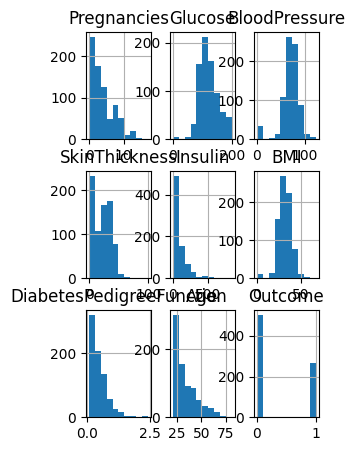

In [11]:
# Création d'un histogramme
df.hist(figsize=(3,5))
plt.show()

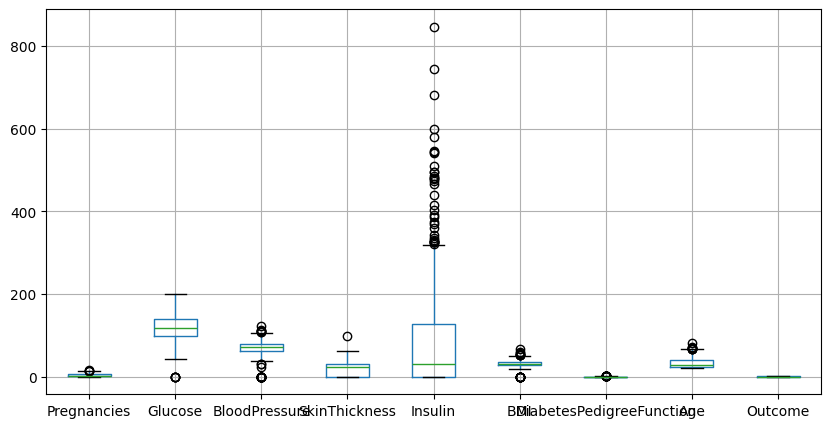

In [12]:
# Création d'un box
df.boxplot(figsize=(10,5))
plt.show()

AttributeError: 'Text' object has no attribute 'containers'

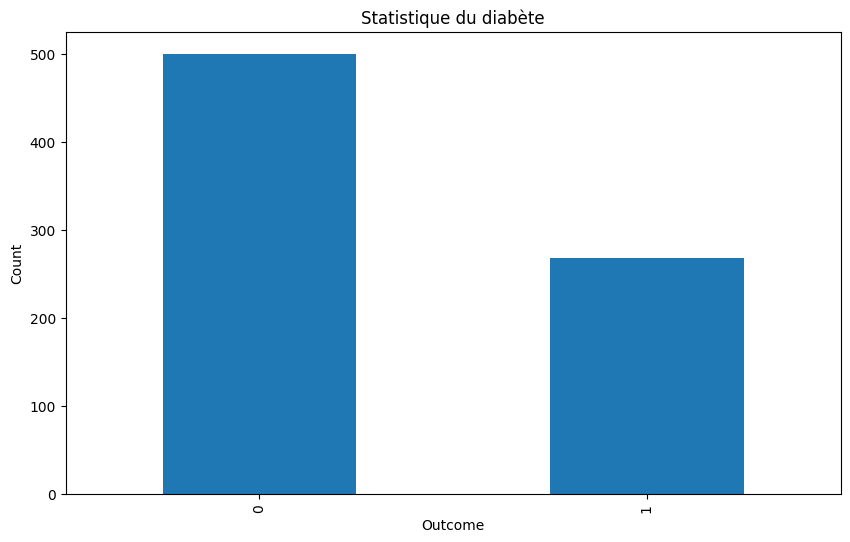

In [13]:
#
bar = df['Outcome'].value_counts().plot(kind='bar', figsize=(10,6))
bar = plt.title('Statistique du diabète')
bar = plt.xlabel('Outcome')
bar = plt.ylabel('Count')
bar = plt.bar_label(bar.containers[0], figsize=10)
plt.show()

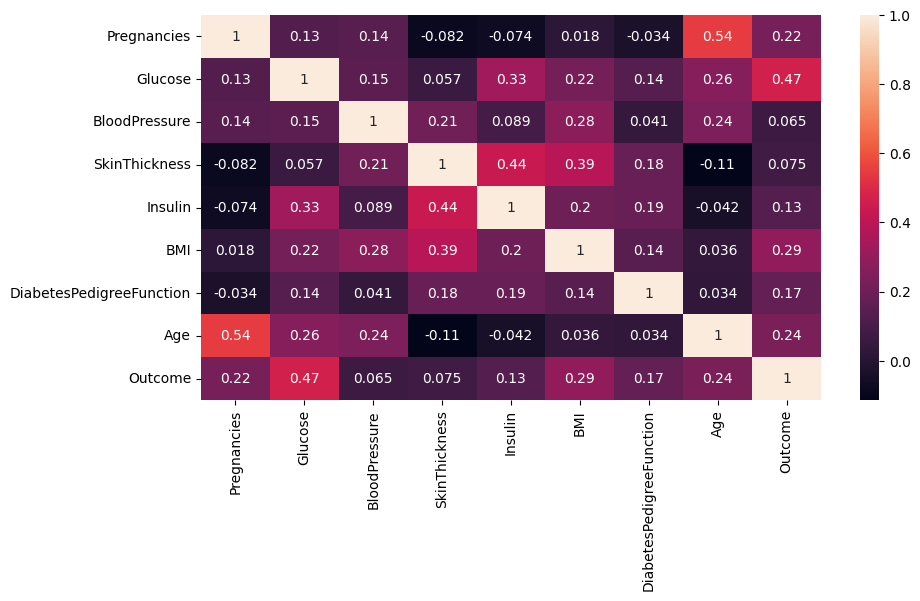

In [14]:
# Matrice de correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()


# Création du modèle ( régression logistique)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=42)

In [16]:
modele_log = LogisticRegression(max_iter=1000)
modele_log.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
pred_train = modele_log.predict(x_train)
pred_test = modele_log.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
f1_score_val = f1_score(y_test, pred_test)

In [19]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score_val}")

Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
F1 Score: 0.6548672566371682


# Testons la prédiction

In [20]:
nouvellePrediction = modele_log.predict([[7,14,72,20,0,33.6,10,0.3]])
print(f"Nouvelle Prédiction : {nouvellePrediction}")

Nouvelle Prédiction : [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Faison la matrice de confusion

In [21]:
confusion_matrix = confusion_matrix(y_test, pred_test)
print("La matrice de confusion est de ; ",confusion_matrix)

La matrice de confusion est de ;  [[78 21]
 [18 37]]


# et c'est quoi le rapport ?

In [22]:
rapport_matrice = classification_report(y_test, pred_test )
print("le rapport est là : ", rapport_matrice)

le rapport est là :                precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Matrice de confusion

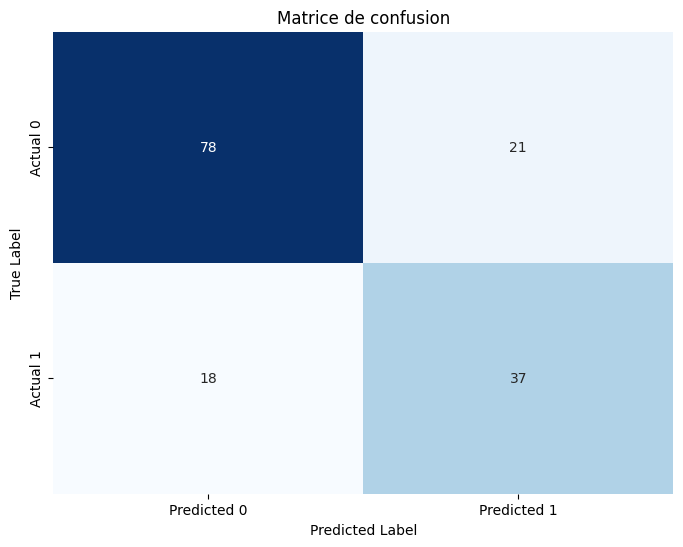

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de confusion')
plt.show()